In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

data_dict = pd.read_csv('data_dict.csv', encoding='latin1')

data = pd.read_csv('demographic_health_data.csv')

data.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

In [2]:
data = data.rename(columns={'19-Oct': '10-19'})

In [3]:
data.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  10-19  \
0  1001    55601   6787               12.206615   7637   
1  1003   218022  24757               11.355276  26913   
2  1005    24881   2732               10.980266   2960   
3  1007    22400   2456               10.964286   2596   
4  1009    57840   7095               12.266598   7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

In [4]:
data.shape

(3140, 108)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
data.duplicated().any()

np.False_

In [7]:
data.isnull().any().any()

np.False_

In [8]:
data.columns.tolist()

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '10-19',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or h

In [9]:
data_dict[data_dict['Feature'] == 'anycondition_prevalence']

Feature  \
76  anycondition_prevalence   

                                           Unnamed: 1 Unnamed: 2  
76  A prevalence rate is the total number of cases...        NaN

In [10]:
data_dict[data_dict['Feature'] == '0-9']

Feature           Unnamed: 1  \
2     0-9  Population aged 0-9   

                                          Unnamed: 2  
2  All of the other age columns are the same but ...

In [11]:
data_dict[data_dict['Feature'] == 'Urban_rural_code']

Feature                                         Unnamed: 1  \
100  Urban_rural_code  It distinguishes metropolitan (metro) counties...   

    Unnamed: 2  
100        NaN

In [12]:
data['Urban_rural_code'].value_counts()

Urban_rural_code
6    1333
5     641
3     372
2     368
4     358
1      68
Name: count, dtype: int64

In [13]:
# Dropping all confidence interval columns

cols = data.columns.tolist()

# Filter columns that do not contain 'CI'
filtered_cols = [col for col in cols if 'CI' not in col]

data = data[filtered_cols]

data.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  10-19  \
0  1001    55601   6787               12.206615   7637   
1  1003   218022  24757               11.355276  26913   
2  1005    24881   2732               10.980266   2960   
3  1007    22400   2456               10.964286   2596   
4  1009    57840   7095               12.266598   7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  Obesity_number  Heart disease_prevalence  \
0                 12.749771  ...           15193                       7.9   
1                 11.564429  ...           50761                       7.8   
2                 12.865239  ...            8013                      11.0   
3                 13.897321  ...            6894                       8.6   
4                 11.901798  ...           15112                       9.2   

   Heart disease_number  COPD_prevalence  COPD_number  diabetes_prevalence  \
0                  3345              8.6         3644                 12.9   
1                 13414              8.6        14692                 12.0   
2                  2159             12.1         2373                 19.7   
3                  1533             10.0         1789                 14.1   
4                  4101             10.5         4661                 13.5   

   diabetes_number  CKD_prevalence  CKD_number  Urban_rural_code  
0             5462             3.1        1326                 3  
1            20520             3.2        5479                 4  
2             3870             4.5         887                 6  
3             2511             3.3         595                 2  
4             6017             3.4        1507                 2  

[5 rows x 94 columns]

In [14]:
data.columns.tolist()

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '10-19',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or h

In [15]:
data['fips'].nunique()

3140

In [16]:
data['STATE_FIPS'].nunique()

51

In [17]:
data['STATE_NAME'].value_counts()

STATE_NAME
Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Louisiana                64
Colorado                 64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Utah     

In [18]:
data['COUNTY_NAME'].value_counts()

COUNTY_NAME
Washington         31
Jefferson          26
Jackson            24
Franklin           24
Lincoln            24
                   ..
Waldo               1
Sagadahoc           1
Piscataquis         1
Penobscot           1
Prince George's     1
Name: count, Length: 1841, dtype: int64

In [19]:
# Dropping county identifiers 

data = data.drop(['fips','COUNTY_NAME','CNTY_FIPS'], axis=1)

In [20]:
data.columns.tolist()

['TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '10-19',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 201

In [21]:
# Total population appears to be represented twice. 

data['TOT_POP'].head(25)

0      55601
1     218022
2      24881
3      22400
4      57840
5      10138
6      19680
7     114277
8      33615
9      26032
10     44153
11     12841
12     23920
13     13275
14     14987
15     51909
16     54762
17     12277
18     10715
19     36986
20     13824
21     83442
22     48956
23     38310
24     71385
Name: TOT_POP, dtype: int64

In [22]:
data['Total Population'].head(25)

0      55036
1     203360
2      26201
3      22580
4      57667
5      10478
6      20126
7     115527
8      33895
9      25855
10     43805
11     13188
12     24625
13     13407
14     14939
15     51073
16     54435
17     12649
18     10955
19     37519
20     13866
21     81703
22     49393
23     40755
24     71194
Name: Total Population, dtype: int64

In [23]:
# The numbers are similar but not identical. The data dictionary does not explain the second one. Dropping the second one.

data = data.drop('Total Population', axis=1)

In [24]:
data.head()

TOT_POP    0-9  0-9 y/o % of total pop  10-19  10-19 y/o % of total pop  \
0    55601   6787               12.206615   7637                 13.735364   
1   218022  24757               11.355276  26913                 12.344167   
2    24881   2732               10.980266   2960                 11.896628   
3    22400   2456               10.964286   2596                 11.589286   
4    57840   7095               12.266598   7570                 13.087828   

   20-29  20-29 y/o % of total pop  30-39  30-39 y/o % of total pop  40-49  \
0   6878                 12.370281   7089                 12.749771   7582   
1  23579                 10.814964  25213                 11.564429  27338   
2   3268                 13.134520   3201                 12.865239   3074   
3   3029                 13.522321   3113                 13.897321   3038   
4   6742                 11.656293   6884                 11.901798   7474   

   ...  Obesity_number  Heart disease_prevalence  Heart disease_number  \
0  ...           15193                       7.9                  3345   
1  ...           50761                       7.8                 13414   
2  ...            8013                      11.0                  2159   
3  ...            6894                       8.6                  1533   
4  ...           15112                       9.2                  4101   

   COPD_prevalence  COPD_number  diabetes_prevalence  diabetes_number  \
0              8.6         3644                 12.9             5462   
1              8.6        14692                 12.0            20520   
2             12.1         2373                 19.7             3870   
3             10.0         1789                 14.1             2511   
4             10.5         4661                 13.5             6017   

   CKD_prevalence  CKD_number  Urban_rural_code  
0             3.1        1326                 3  
1             3.2        5479                 4  
2             4.5         887                 6  
3             3.3         595                 2  
4             3.4        1507                 2  

[5 rows x 90 columns]

In [25]:
data_dict[data_dict['Feature'] == 'POP_ESTIMATE_2018']

Empty DataFrame
Columns: [Feature, Unnamed: 1, Unnamed: 2]
Index: []

In [26]:
# Investigating to see if this column is another representation of population

data['POP_ESTIMATE_2018'].head()

0     55601
1    218022
2     24881
3     22400
4     57840
Name: POP_ESTIMATE_2018, dtype: int64

In [27]:
data['POP_ESTIMATE_2018'] == data['TOT_POP']

0       True
1       True
2       True
3       True
4       True
        ... 
3135    True
3136    True
3137    True
3138    True
3139    True
Length: 3140, dtype: bool

In [28]:
# Dropping POP_ESTIMATE

data = data.drop('POP_ESTIMATE_2018', axis=1)

In [29]:
data.columns.tolist()

['TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '10-19',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 2014-18",
 'Percent of ad

In [30]:
data['STATE_NAME'].value_counts()

STATE_NAME
Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Louisiana                64
Colorado                 64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Utah     

In [31]:
data['STATE_NAME'].nunique()

51

In [32]:
data['STATE_FIPS'].value_counts()

STATE_FIPS
48    254
13    159
51    133
21    120
29    115
20    105
17    102
37    100
19     99
47     95
31     93
18     92
39     88
27     87
26     83
28     82
40     77
5      75
55     72
42     67
1      67
12     67
46     66
22     64
8      64
36     62
6      58
30     56
54     55
38     53
45     46
16     44
53     39
41     36
35     33
49     29
2      27
24     24
56     23
34     21
32     17
23     16
4      15
50     14
25     14
33     10
9       8
15      5
44      5
10      3
11      1
Name: count, dtype: int64

In [33]:
data['STATE_FIPS'].nunique()

51

State name and state fips appear to be consistent with each other. After some analysis by state, it may make sense to drop state identifiers.

In [34]:
# Analysis by state

state_grouped_anycondition = data.groupby('STATE_NAME')['anycondition_prevalence'].mean().reset_index()

state_grouped_anycondition.sort_values(by='anycondition_prevalence', ascending=False, inplace=True)

state_grouped_anycondition

STATE_NAME  anycondition_prevalence
48         West Virginia                55.930909
24           Mississippi                54.503659
17              Kentucky                54.342500
0                Alabama                53.026866
18             Louisiana                51.839062
42             Tennessee                51.256842
3               Arkansas                50.680000
36              Oklahoma                50.316883
40        South Carolina                49.719565
43                 Texas                49.285433
35                  Ohio                48.664773
25              Missouri                48.602609
10               Georgia                47.933962
33        North Carolina                47.919000
22              Michigan                47.633735
16                Kansas                47.354286
28                Nevada                47.005882
9                Florida                46.925373
14               Indiana                46.793478
13              Illinois                46.694118
34          North Dakota                46.456604
46              Virginia                45.647368
31            New Mexico                45.481818
27              Nebraska                45.321505
2                Arizona                45.293333
7               Delaware                45.200000
15                  Iowa                44.863636
38          Pennsylvania                44.804478
37                Oregon                44.250000
41          South Dakota                44.040909
20              Maryland                43.841667
19                 Maine                43.206250
49             Wisconsin                42.844444
32              New York                42.630645
1                 Alaska                42.403704
12                 Idaho                42.093182
23             Minnesota                42.009195
47            Washington                40.794872
26               Montana                40.748214
29         New Hampshire                40.210000
44                  Utah                39.227586
50               Wyoming                38.947826
4             California                38.218966
30            New Jersey                38.109524
11                Hawaii                37.600000
45               Vermont                37.100000
39          Rhode Island                36.540000
6            Connecticut                36.225000
21         Massachusetts                36.021429
5               Colorado                35.179688
8   District of Columbia                32.000000

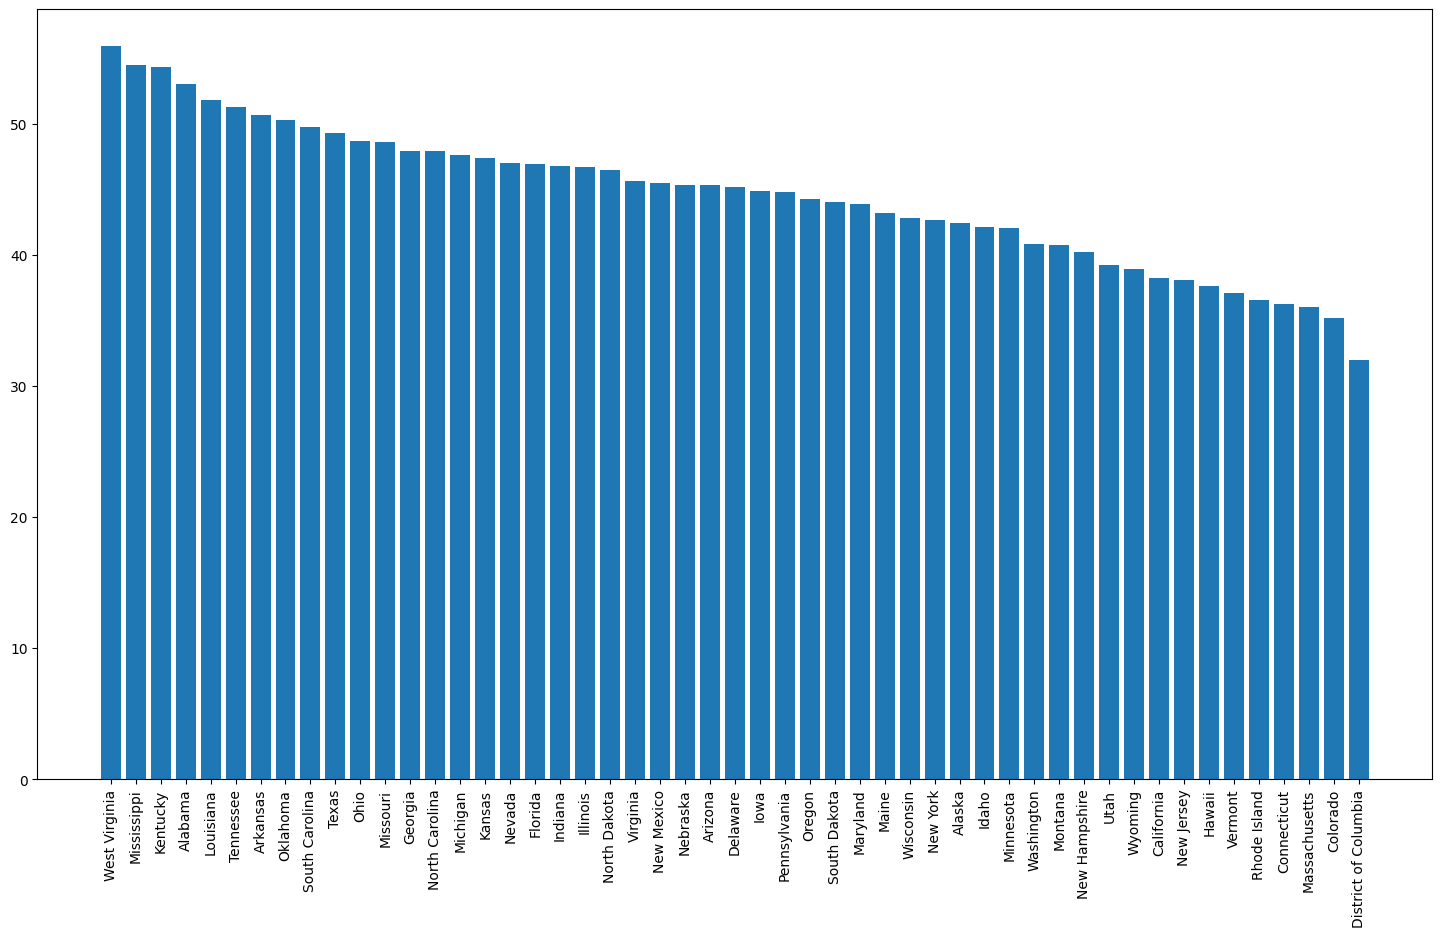

In [35]:
# Bar graph of mean anycondition_prevalence by state

plt.figure(figsize=(18, 10))

plt.bar(x=state_grouped_anycondition['STATE_NAME'], height=state_grouped_anycondition['anycondition_prevalence'])
plt.tick_params(axis='x', rotation=90)

plt.show()

In [36]:
# Getting mean heart disease by state

state_grouped_hd = data.groupby('STATE_NAME')['Heart disease_prevalence'].mean().reset_index()

state_grouped_hd.sort_values(by='Heart disease_prevalence', ascending=False, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

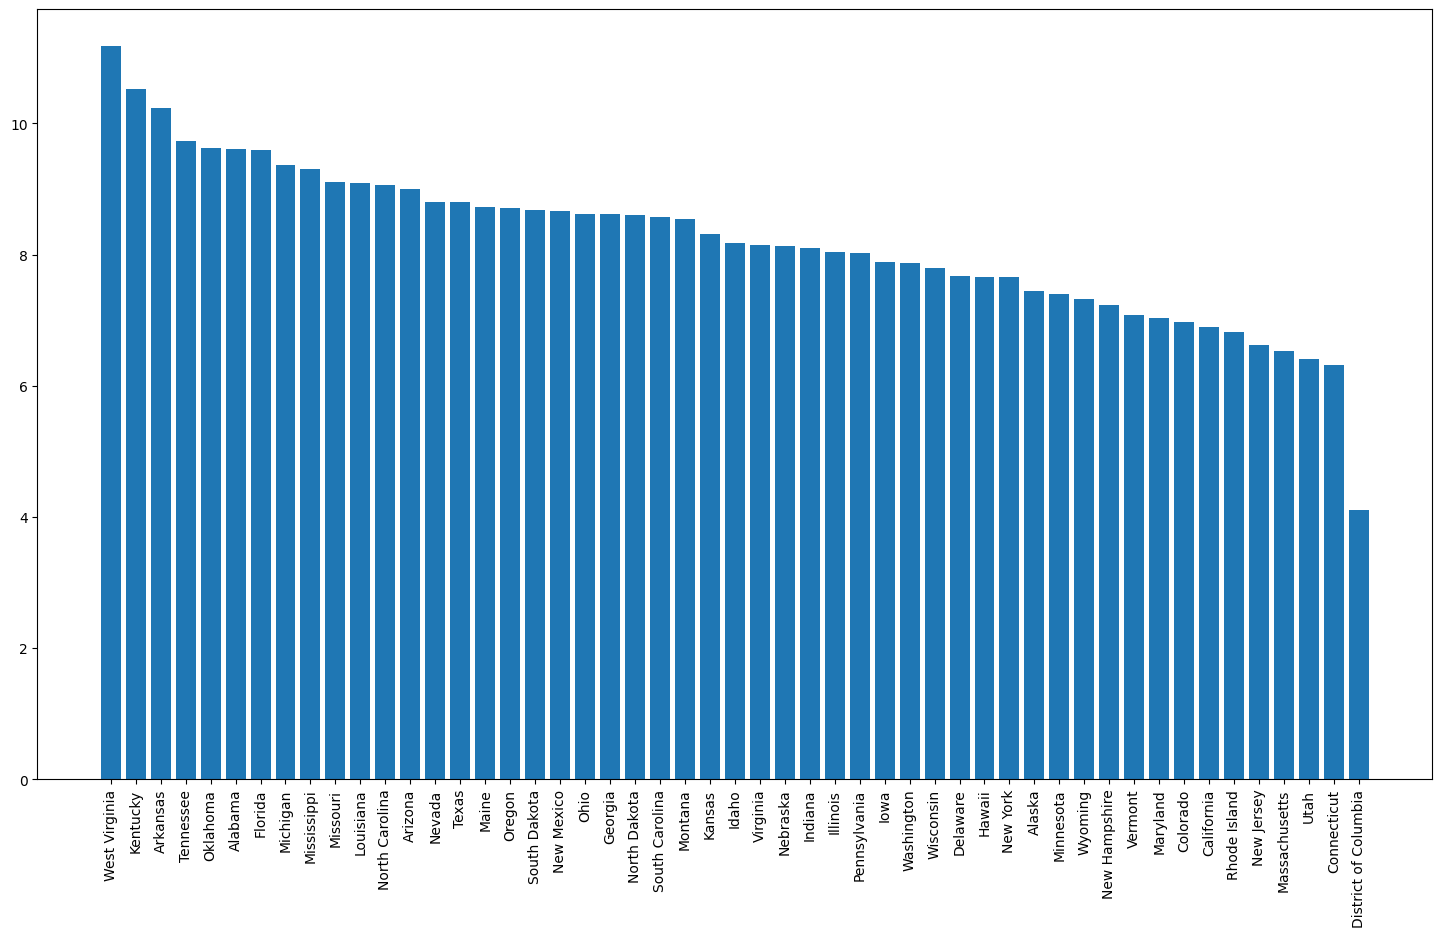

In [37]:
# Bar graph of mean heart disease prevalence by state

plt.figure(figsize=(18, 10))

plt.bar(x=state_grouped_hd['STATE_NAME'], height=state_grouped_hd['Heart disease_prevalence'])

plt.tick_params(axis='x', rotation=90)
plt.show

In [38]:
# Dropping STATE_FIPS rather than state name to avoid assigning numerical value to state.

data = data.drop(['STATE_FIPS'], axis=1)

In [39]:
data.head()

TOT_POP    0-9  0-9 y/o % of total pop  10-19  10-19 y/o % of total pop  \
0    55601   6787               12.206615   7637                 13.735364   
1   218022  24757               11.355276  26913                 12.344167   
2    24881   2732               10.980266   2960                 11.896628   
3    22400   2456               10.964286   2596                 11.589286   
4    57840   7095               12.266598   7570                 13.087828   

   20-29  20-29 y/o % of total pop  30-39  30-39 y/o % of total pop  40-49  \
0   6878                 12.370281   7089                 12.749771   7582   
1  23579                 10.814964  25213                 11.564429  27338   
2   3268                 13.134520   3201                 12.865239   3074   
3   3029                 13.522321   3113                 13.897321   3038   
4   6742                 11.656293   6884                 11.901798   7474   

   ...  Obesity_number  Heart disease_prevalence  Heart disease_number  \
0  ...           15193                       7.9                  3345   
1  ...           50761                       7.8                 13414   
2  ...            8013                      11.0                  2159   
3  ...            6894                       8.6                  1533   
4  ...           15112                       9.2                  4101   

   COPD_prevalence  COPD_number  diabetes_prevalence  diabetes_number  \
0              8.6         3644                 12.9             5462   
1              8.6        14692                 12.0            20520   
2             12.1         2373                 19.7             3870   
3             10.0         1789                 14.1             2511   
4             10.5         4661                 13.5             6017   

   CKD_prevalence  CKD_number  Urban_rural_code  
0             3.1        1326                 3  
1             3.2        5479                 4  
2             4.5         887                 6  
3             3.3         595                 2  
4             3.4        1507                 2  

[5 rows x 88 columns]

In [40]:
# Getting the column names for numerical and categorical data

num_var = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

cat_var = data.select_dtypes(include=['object']).columns.tolist()

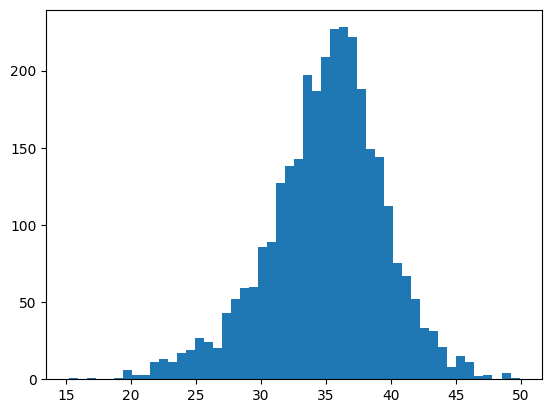

In [41]:
# Histogram of obesity prevalence

plt.hist(data['Obesity_prevalence'], bins=50)
plt.show()

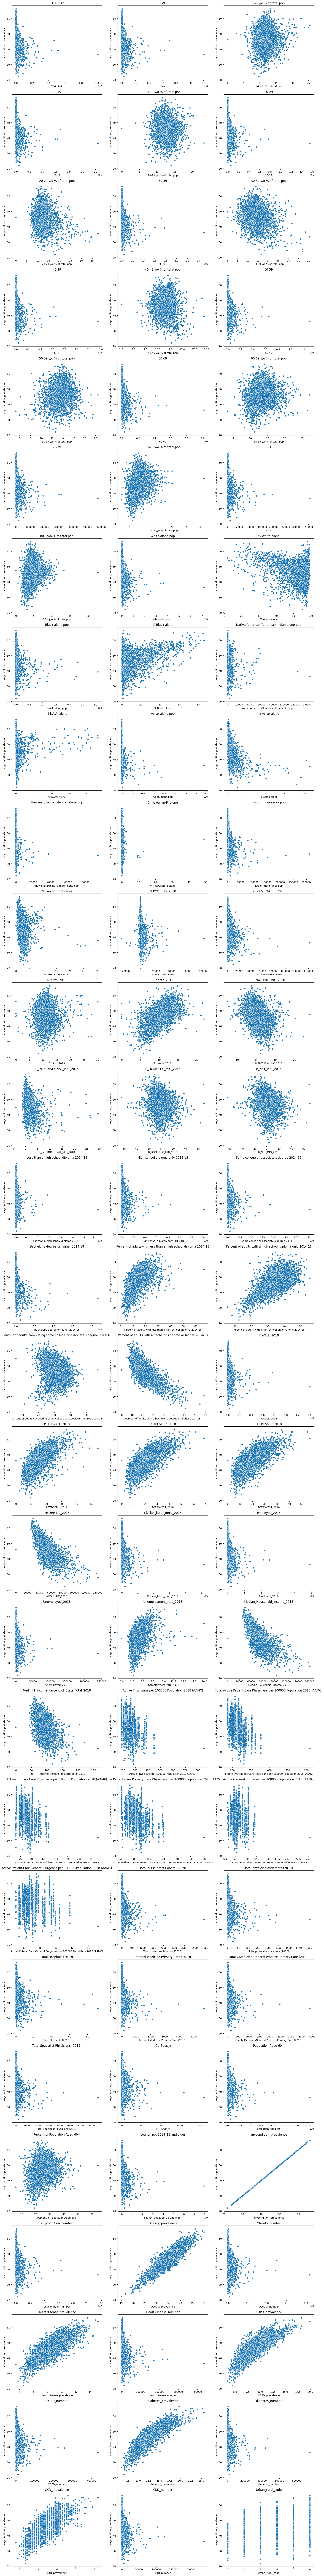

In [42]:
# Scatterplots for num_var vs anycondition

columns = 3
rows = -(-len(num_var) // columns)  

fig, axes = plt.subplots(rows, columns, figsize=(18, 5 * rows))

for i, col in enumerate(num_var):
    x, y = divmod(i, columns)
    sns.scatterplot(data=data, x=col, y='anycondition_prevalence', ax=axes[x, y])
    axes[x, y].set_title(f'{col}')

plt.subplots_adjust(hspace=0.8, wspace=0.8)

plt.tight_layout()
plt.show()

In [43]:
cat_var

['STATE_NAME']

In [44]:
# Getting dummy variables for categorical data

cat_data = pd.get_dummies(data[cat_var])

In [45]:
# Resetting cat_var to match dummy variables

cat_var = cat_data.columns.tolist()

cat_var

['STATE_NAME_Alabama',
 'STATE_NAME_Alaska',
 'STATE_NAME_Arizona',
 'STATE_NAME_Arkansas',
 'STATE_NAME_California',
 'STATE_NAME_Colorado',
 'STATE_NAME_Connecticut',
 'STATE_NAME_Delaware',
 'STATE_NAME_District of Columbia',
 'STATE_NAME_Florida',
 'STATE_NAME_Georgia',
 'STATE_NAME_Hawaii',
 'STATE_NAME_Idaho',
 'STATE_NAME_Illinois',
 'STATE_NAME_Indiana',
 'STATE_NAME_Iowa',
 'STATE_NAME_Kansas',
 'STATE_NAME_Kentucky',
 'STATE_NAME_Louisiana',
 'STATE_NAME_Maine',
 'STATE_NAME_Maryland',
 'STATE_NAME_Massachusetts',
 'STATE_NAME_Michigan',
 'STATE_NAME_Minnesota',
 'STATE_NAME_Mississippi',
 'STATE_NAME_Missouri',
 'STATE_NAME_Montana',
 'STATE_NAME_Nebraska',
 'STATE_NAME_Nevada',
 'STATE_NAME_New Hampshire',
 'STATE_NAME_New Jersey',
 'STATE_NAME_New Mexico',
 'STATE_NAME_New York',
 'STATE_NAME_North Carolina',
 'STATE_NAME_North Dakota',
 'STATE_NAME_Ohio',
 'STATE_NAME_Oklahoma',
 'STATE_NAME_Oregon',
 'STATE_NAME_Pennsylvania',
 'STATE_NAME_Rhode Island',
 'STATE_NAME_Sou

In [46]:
# Recreating the dataframe with the numerical and dummy columns 

data = pd.concat([data[num_var], cat_data], axis=1)


In [47]:
# Creating lists for features and target

num_var.remove('anycondition_prevalence') # Removing target from num_var

features = num_var + cat_var

target = ['anycondition_prevalence'] # 

In [48]:
# Separating the dataset

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8 )

In [49]:
# Separating the numerical parts of X for scaling

X_train_num = X_train[num_var]
X_test_num = X_test[num_var]

In [50]:
# Scaling the numerical data

# Using the StandardScaler gives much better results for the Linear Regression, but the Lasso model needs the MinMaxScaler to converge

# scaler = StandardScaler()
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train_num.index, columns=X_train_num.columns)

X_test_scaled = scaler.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test_num.index, columns=X_test_num.columns)


In [51]:
# Reassembling the fully processed X sets

X_train_p = pd.concat([X_train_scaled, X_train[cat_var]], axis=1)
X_test_p = pd.concat([X_test_scaled, X_test[cat_var]], axis=1)


In [52]:
# Initializing and training of the model

model = LinearRegression()
model.fit(X_train_p, y_train)

LinearRegression()

In [53]:
# Evaluating Linear Regression

y_pred = model.predict(X_test_p)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 1.7229559118866462
Coefficient of determination: 0.9576195104677632


In [54]:
# Initializing and training Lasso model

lasso_model = Lasso(alpha=0.1, max_iter=7000)
lasso_model.fit(X_train_p, y_train)

Lasso(alpha=0.1, max_iter=7000)

In [55]:
# Evaluating Lasso model

y_pred = lasso_model.predict(X_test_p)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 3.166446800032143
Coefficient of determination: 0.9221131750746878


In [56]:
lasso_model.coef_

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [57]:
nonzero_indices = np.nonzero(lasso_model.coef_)
nonzero_indices

(array([75, 77, 79, 81]),)

In [58]:
cols = []
for idx in nonzero_indices[0]:
    cols.append(X_train_p.columns.tolist()[idx])

print(cols)

['Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence']


In [59]:
# Trying a Lasso model without the other health conditions (removing all condition-related variables--not just the ones the Lasso model used)

var_to_remove = [
 'anycondition_number',
 'Obesity_prevalence',
 'Obesity_number',
 'Heart disease_prevalence',
 'Heart disease_number',
 'COPD_prevalence',
 'COPD_number',
 'diabetes_prevalence',
 'diabetes_number',
 'CKD_prevalence',
 'CKD_number'
]

for var in var_to_remove:
    features.remove(var)

In [60]:
features

['TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '10-19',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 2014-18",
 'Percent of ad

In [61]:
# Resetting X to match new features

X_train_p = X_train_p[features]
X_test_p = X_test_p[features]

In [62]:
# Initializing and training another Lasso model

lasso_model_a = Lasso(alpha=0.1, max_iter=7000)
lasso_model_a.fit(X_train_p, y_train)

Lasso(alpha=0.1, max_iter=7000)

In [63]:
# Evaluating new Lasso model

y_pred = lasso_model_a.predict(X_test_p)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 10.68233944333577
Coefficient of determination: 0.7372406503063924


In [64]:
lasso_model_a.coef_

array([ -0.        ,  -0.        ,   0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
        -0.        ,  -0.        ,   1.55172101,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,   0.        ,   5.49447772,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.93825257,
         2.97789262,  -0.        , -19.14819115,  -0.        ,
         0.        ,  11.6860592 ,   0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.  

In [65]:
# Finding coefficients for revised Lasso model

nonzero_indices = np.nonzero(lasso_model_a.coef_)

cols = []
for idx in nonzero_indices[0]:
    cols.append(X_train_p.columns.tolist()[idx])

cols

['% Black-alone',
 'R_death_2018',
 'Percent of adults with less than a high school diploma 2014-18',
 'Percent of adults with a high school diploma only 2014-18',
 "Percent of adults with a bachelor's degree or higher 2014-18",
 'PCTPOV017_2018',
 'STATE_NAME_Colorado',
 'STATE_NAME_Kentucky',
 'STATE_NAME_Texas',
 'STATE_NAME_West Virginia']

In [66]:
# Initializing and training Ridge model

ridge_model = Ridge(alpha=0.1, max_iter=300)
ridge_model.fit(X_train_p, y_train)


Ridge(alpha=0.1, max_iter=300)

In [67]:
# Evaluating Ridge model

y_pred = ridge_model.predict(X_test_p)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 4.651579581656657
Coefficient of determination: 0.8855825512372507


In [68]:
# Looking at the Ridge model coefficients

ridge_model.coef_

array([ 1.54701935,  4.45687858,  0.93016055,  5.33643059,  1.25060365,
       -1.43208758, -8.85842753,  2.05741883, -0.2613788 ,  2.49244619,
        2.99507207,  1.68543676,  0.64673886, -0.87763875,  2.14400212,
       -2.07359392,  4.0663613 , -2.00160836,  1.61013795,  3.40787473,
       -5.22465198, -7.92507295,  2.86501184, -5.14885579,  0.96673106,
        0.78535499, -5.01608212,  3.96493692,  6.37464316,  0.68625844,
        2.25187237, -0.79612882,  0.302387  ,  2.06252346,  2.8920874 ,
       -0.07181027, -1.85911174,  0.28708183,  0.0128842 ,  0.12234849,
        1.03023502,  8.87443065, -4.46102254,  7.25996408,  4.20535303,
        4.41402881, -9.86905118, -2.53636858,  6.54119111,  4.48599321,
       -2.93552333, -0.40595661, -0.04463616, -0.23081504,  3.75651843,
        3.37279146, -0.40595661, -5.82923788, -0.18784054, -1.29736975,
       -1.48675058, -3.08736516,  1.08992404, -0.12260239, -5.03337513,
       -5.73975587,  0.73004628,  0.55969567,  4.11747557, -0.28

In [69]:
# Optimizing the Ridge model

alpha_grid = {'alpha': np.logspace(-4,4,20)}

grid = GridSearchCV(estimator=ridge_model, param_grid=alpha_grid, cv=5, scoring='r2')

grid.fit(X_train_p, y_train)

print('Best alpha:', grid.best_params_['alpha'])
print('Best R2 score:', grid.best_score_)

opt_alpha = grid.best_params_['alpha']



Best alpha: 0.23357214690901212
Best R2 score: 0.8728295127438479


In [70]:
# Ridge model with the optimized alpha

ridge_model = Ridge(alpha=opt_alpha, max_iter=300)
ridge_model.fit(X_train_p, y_train)

y_pred = ridge_model.predict(X_test_p)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")


Mean squared error: 4.6594478577333565
Coefficient of determination: 0.885389010944313
